<a href="https://colab.research.google.com/github/silviaarellanogarcia/HackEPS2022/blob/main/missi%C3%B3_vermella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍓 MISSIÓ VERMELLA 🍓

## Objectius

La idea d'aquesta missió es orientar-la amb l'etiquetatge de dades. Part de la feina d'un data scientist és tenir dades amb la major informació possible per detectar patrons, problemes, estadístiques... Amb el dataset A1 volem que observeu les teles i realitzeu un algoritme per etiquetar les dades segons l'error. Podeu fer servir el .csv que hi ha dins de la carpeta, on trobareu una categoria que explica amb llenguatge natural una mica quin error és. Es voldrà obviar si l'error de l'imatge és a causa de la càmara, és a dir, no es tindran en compte aquestes imatges.

Aquí teniu alguns exemples d'errors:

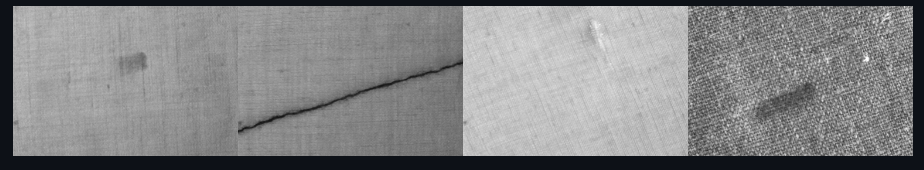

Guanyarà l'algoritme que més imatges pugui etiquetar correctament.

Voldrem classificar els errors de la següent manera:

Forats
Marques verticals
Marques horitzontals
Taques d'oli
Plegaments
Franja de colors
Altres irregularitats
Què ens heu de donar? Un document (en Markdown, pdf, docx...) enumerant els diferents errors i un csv amb el nom del fitxer de la imatge i el tipus d'error en qüestió.

# Setting up enviroment

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re


Mounting our drive account to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading the dataframe from the dataset given

In [ ]:
df = pd.read_csv("gdrive/MyDrive/HackEPS2022/data/groc/A1/img_tag.csv")

# Implementation

Function `extract_groups_form_text` gets an error text from the dataset and returns the possible error tag from its description

In [ ]:
def extract_groups_form_text(text):
    regex_groups = {
        'Agujero': r'(.*agujero.*)|(.*grieta.*)|(.*desgarro.*)',
        'Raya': r'(.*raya.*)',
        'Mancha de color': r'(.*color.*)',
        'Mancha de aceite': r'(.*mancha.*)|(.*franja.*)|(.*aceite.*)|(.*grasa.*)',
        'Pliegues': r'(.*pliegue.*)|(.*doble.*)|(.*arruga.*)',
        'Hilo': r'(.*hilo.*)'
    }
    for regex_type, regex_expression in regex_groups.items():
        if re.search(regex_expression, str(text), flags=re.IGNORECASE) is not None:
            return regex_type
    return 'Otros'

Mapping the `extract_groups_form_text` to the whole dataframe and creating a new field named Tag from its result.

In [ ]:
df['Tag'] = df.text.map(extract_groups_form_text)

Taking a look at the number of 

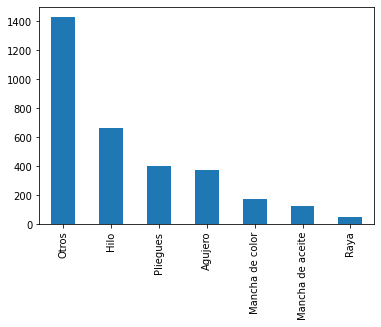

In [ ]:
df.Tag.value_counts().plot(kind="bar")

Saving the result dataframe to a file in drive

In [ ]:
df.to_csv("gdrive/MyDrive/HackEPS2022/vermell.csv")